In [15]:
# https://www.kaggle.com/hosubjeong/diabetes-with-randomsearchcv

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
sns.set(style = 'darkgrid')

In [4]:
df = pd.read_csv('diabetes.csv')
df.shape

(768, 9)

In [5]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

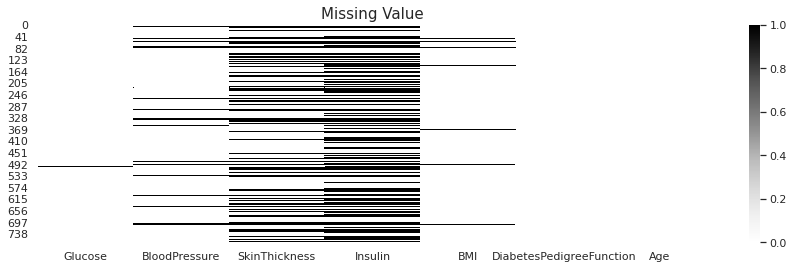

In [10]:
plt.figure(figsize = (15,4))

df_null = df.iloc[:,1:-1].replace(0, np.nan)

sns.heatmap(df_null.isnull(), cmap = 'Greys')
plt.title('Missing Value', size = 15)
plt.show()

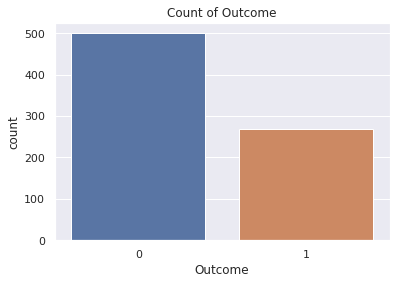

In [11]:
sns.countplot(df['Outcome'])
plt.title('Count of Outcome')
plt.show()


In [12]:
df_0 = df[df['Outcome'] == 0]
df_1 = df[df['Outcome'] == 1]
df_0.shape, df_1.shape


((500, 9), (268, 9))

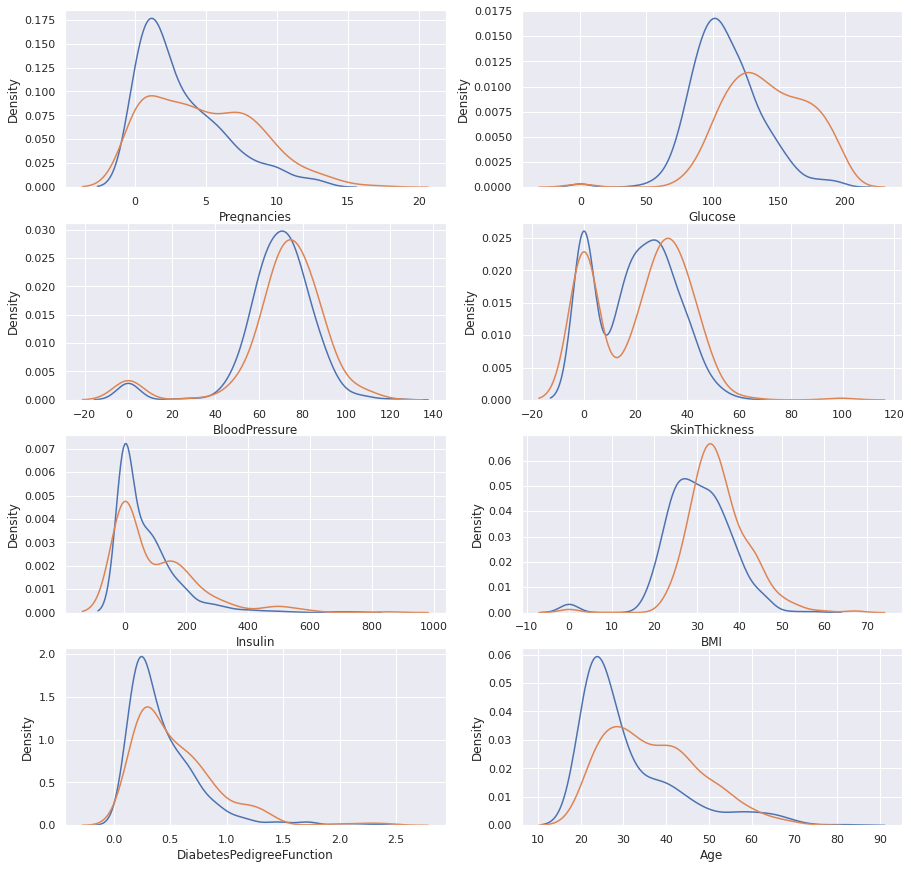

In [13]:
fig, axes = plt.subplots(nrows=4, ncols = 2, figsize = (15,15))
for i, col_name in enumerate(df.iloc[:,:-1]):
    row = i // 2
    col = i % 2
    sns.distplot(df_0[col_name], ax = axes[row,col], hist = False)
    sns.distplot(df_1[col_name], ax = axes[row,col], hist = False)
plt.show()

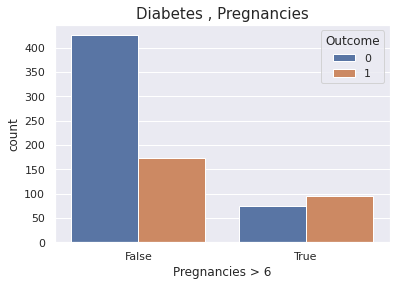

In [14]:
df['Pregnancies_high'] = df['Pregnancies'] > 6
sns.countplot(data = df, x = 'Pregnancies_high', hue = 'Outcome')
plt.title('Diabetes , Pregnancies', size = 15)
plt.xlabel('Pregnancies > 6')
plt.show()


In [16]:
df['Insulin'].replace(0, np.nan, inplace = True)
df.groupby('Outcome')['Insulin'].agg(['mean', 'median'])

mean  median
Outcome                    
0        130.287879   102.5
1        206.846154   169.5

In [17]:
df['Insulin'].fillna(df.groupby('Outcome')['Insulin'].transform('median'), inplace = True)

# Correlation

In [18]:
df_matrix = df
df_corr = df.corr()

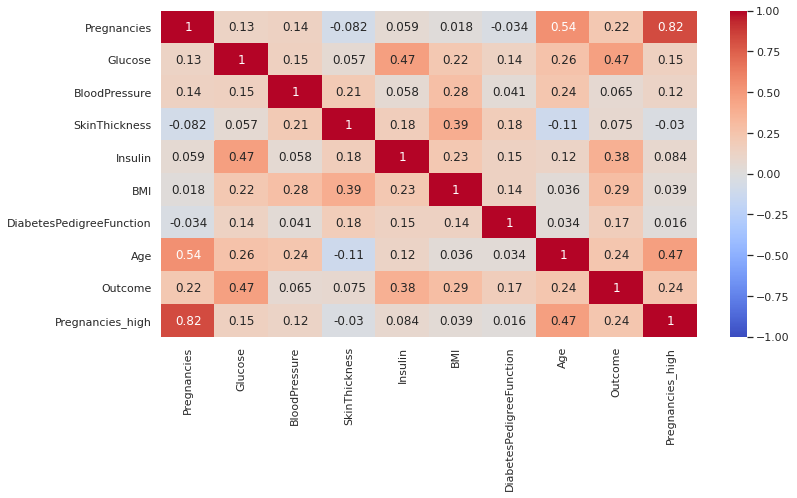

In [19]:
plt.figure(figsize = (12,6))
sns.heatmap(df_corr, vmax = 1, vmin = -1, cmap = 'coolwarm', annot = True)
plt.show()

<Figure size 720x288 with 0 Axes>

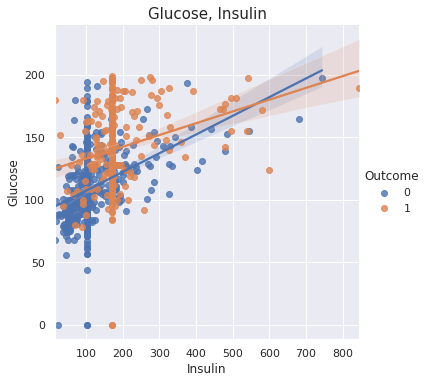

In [20]:
plt.figure(figsize = (10,4))
sns.lmplot(data = df, x = 'Insulin', y = 'Glucose',hue = 'Outcome')
plt.title('Glucose, Insulin', size = 15)
plt.show()

In [21]:
df['low_glu_insulin'] =(df['Glucose'] < 100) & (df['Insulin'] <= 102.5)
pd.crosstab(df['Outcome'], df['low_glu_insulin'])


low_glu_insulin  False  True 
Outcome                      
0                  332    168
1                  263      5

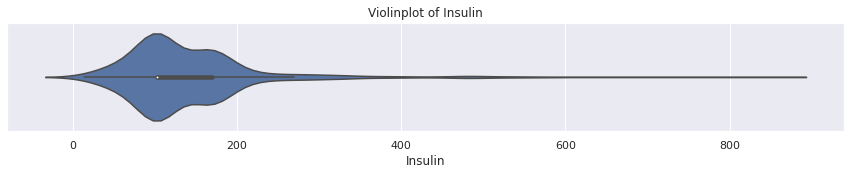

In [22]:
plt.figure(figsize = (15,2))
sns.violinplot(df['Insulin'])
plt.title('Violinplot of Insulin')
plt.show()

In [23]:
df = df[df['Insulin'] < 600]
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35    169.5  33.6   
1            1       85             66             29    102.5  26.6   
2            8      183             64              0    169.5  23.3   
3            1       89             66             23     94.0  28.1   
4            0      137             40             35    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  Pregnancies_high  low_glu_insulin  
0                     0.627   50        1             False            False  
1                     0.351   31        0             False             True  
2                     0.672   32        1              True            False  
3                     0.167   21        0             False             True  
4                     2.288   33        1             False            False

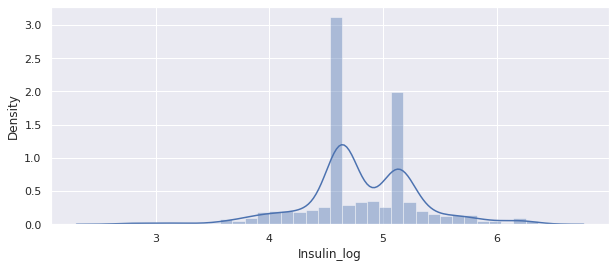

In [24]:
plt.figure(figsize = (10,4))
df['Insulin_log'] = np.log(df['Insulin'] + 1)
sns.distplot(df["Insulin_log"])
plt.show()

In [25]:
from sklearn.model_selection import train_test_split

X = df[['Glucose', 'BloodPressure', 'SkinThickness',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies_high',
        'Insulin_log', 'low_glu_insulin']]
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print('train 개수: ', X_train.shape, y_train.shape)
print('test 개수: ', X_test.shape, y_test.shape)


train 개수:  (534, 9) (534,)
test 개수:  (230, 9) (230,)


In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from lightgbm import LGBMClassifier

estimators = [DecisionTreeClassifier(random_state = 42),
             RandomForestClassifier(random_state = 42),
             GradientBoostingClassifier(random_state = 42)
             ]
estimators



[DecisionTreeClassifier(random_state=42),
 RandomForestClassifier(random_state=42),
 GradientBoostingClassifier(random_state=42)]

In [28]:
max_depth = np.random.randint(2,20,20)
max_features = np.random.uniform(0.5, 1.0, 20)

param_distributions = {
    'max_depth' : max_depth, 
    'max_features' : max_features}
param_distributions

{'max_depth': array([18, 11, 19,  7, 19,  8, 16, 10, 15, 15,  5,  3,  6,  8, 11,  7,  7,
        16, 18, 11]),
 'max_features': array([0.81936315, 0.54835709, 0.84740964, 0.5906501 , 0.63162426,
        0.56541264, 0.65247737, 0.97152877, 0.92349145, 0.58460114,
        0.57443637, 0.56326278, 0.61512789, 0.94615469, 0.98166895,
        0.95110315, 0.60151333, 0.72031925, 0.78578083, 0.63738389])}

In [29]:
from sklearn.model_selection import RandomizedSearchCV
results = []

for estimator in estimators:
    result = []
    if estimator.__class__.__name__ != 'DecisionTreeClassifier':
        param_distributions['n_estimators'] = np.random.randint(100,1000,10)
        
    clf = RandomizedSearchCV(estimator, 
                             param_distributions = param_distributions, 
                             n_iter = 100,
                             scoring = 'accuracy',
                             n_jobs = -1,
                             cv = 5,
                             verbose = 2)
    clf.fit(X_train, y_train)
    result.append(estimator.__class__.__name__)
    result.append(clf.best_params_)
    result.append(clf.best_estimator_)
    result.append(clf.best_score_)
    result.append(clf.score(X_test, y_test))
    result.append(clf.cv_results_)
    results.append(result)
    

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [30]:
df_cv = pd.DataFrame(results)
df_cv.columns = ['model', 'best_params', 'best_estimator', 'train_score', 'test_score', 'cv_result']
df_cv

model  \
0      DecisionTreeClassifier   
1      RandomForestClassifier   
2  GradientBoostingClassifier   

                                         best_params  \
0  {'max_features': 0.5906500975234372, 'max_dept...   
1  {'n_estimators': 877, 'max_features': 0.847409...   
2  {'n_estimators': 979, 'max_features': 0.584601...   

                                      best_estimator  train_score  test_score  \
0  DecisionTreeClassifier(max_depth=3, max_featur...     0.865156    0.886957   
1  (DecisionTreeClassifier(max_depth=5, max_featu...     0.887639    0.904348   
2  ([DecisionTreeRegressor(criterion='friedman_ms...     0.891342    0.886957   

                                           cv_result  
0  {'mean_fit_time': [0.014047479629516602, 0.035...  
1  {'mean_fit_time': [3.0483232498168946, 0.45032...  
2  {'mean_fit_time': [5.5428424835205075, 7.51399...

In [31]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

model = df_cv.loc[1, 'best_estimator']
model.fit(X_train, y_train)
y_predict = model.predict(X_test)




In [32]:
pd.DataFrame(confusion_matrix(y_test, y_predict))

0   1
0  140   7
1   15  68

In [33]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93       147
           1       0.91      0.82      0.86        83

    accuracy                           0.90       230
   macro avg       0.90      0.89      0.89       230
weighted avg       0.90      0.90      0.90       230



In [34]:
lgbm = LGBMClassifier(n_estimators = 100, num_leaves =61, random_state = 42)
lgbm.fit(X_train, y_train)
y_predict = lgbm.predict(X_test)

pd.DataFrame(confusion_matrix(y_test, y_predict))

0   1
0  136  11
1   13  70

In [35]:
lgbm_report = classification_report(y_test, y_predict)
print(lgbm_report)

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       147
           1       0.86      0.84      0.85        83

    accuracy                           0.90       230
   macro avg       0.89      0.88      0.89       230
weighted avg       0.90      0.90      0.90       230



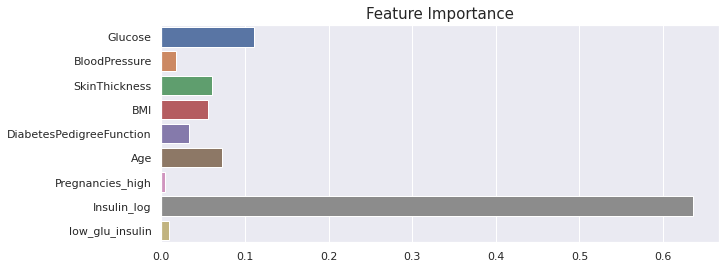

In [36]:
plt.figure(figsize = (10,4))

feature_importance=model.feature_importances_
sns.barplot(x = feature_importance, y = X_train.columns)

plt.title('Feature Importance', size = 15)
plt.show()

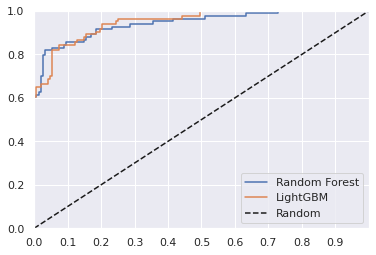

In [37]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

pred_proba = model.predict_proba(X_test)[:, 1] 
pred_proba_lgbm = lgbm.predict_proba(X_test)[:,1]

def roc_curve_plot(y_test, pred_proba):
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba)
    fprs2, tprs2, threshholds = roc_curve(y_test, pred_proba_lgbm)
    plt.plot(fprs, tprs, label = 'Random Forest')
    plt.plot(fprs2, tprs2, label = 'LightGBM')
    plt.plot([0,1],[0,1], 'k--', label = "Random")
    plt.xlim(0,1); plt.ylim(0,1)
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    

roc_curve_plot(y_test, pred_proba)
plt.legend()
plt.show()

In [38]:
print('Random Forest AUC: ', roc_auc_score(y_test, pred_proba))
print('LightGBM AUC: ', roc_auc_score(y_test, pred_proba_lgbm))

Random Forest AUC:  0.9437751004016065
LightGBM AUC:  0.9500040980247522
